## Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

## Zadanie 1
### Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować

In [167]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_names = ["x", "y", "cluster"]
file_paths = glob.glob("dataset/*.txt")

dfs = {}

for file_path in file_paths:
    file_name = file_path.split("/")[-1].split(".")[0]
    dfs[file_name] = pd.read_csv(file_path, names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

**Zbiór blobs**

In [168]:
dfs['blobs'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór circles**

In [169]:
dfs['circles'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór ellipses**

In [170]:
dfs['ellipses'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór moons**

In [171]:
dfs['moons'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


### Normalizacja danych liczbowych

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xs = {}

for key, df in dfs.items():
    X = df.drop('cluster', axis=1)
    Xs[key] = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Zbiór blobs**

In [173]:
dfs['blobs'].head()

x         y  cluster
0  1.103182  4.705777        0
1 -1.932846  3.642251        2
2 -2.034422  1.866002        2
3  1.616402  2.686831        0
4 -0.960010  4.492566        0

**Zbiór circles**

In [174]:
dfs['circles'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór ellipses**

In [175]:
dfs['ellipses'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór moons**

In [176]:
dfs['moons'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


### Prezentacja klastrów na wykresach

#### Wykresy klastrów dla poszczególnych zbiorów danych

Pomocnicza funkcja, rysująca wykresy

In [177]:
def plot_clusters(df, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(df['x'], df['y'], c=df['cluster'])
    plt.title(title)
    plt.show()

Wykresy, przedstawiające rozmieszczenie klastrów dla wszystkich zbiorów

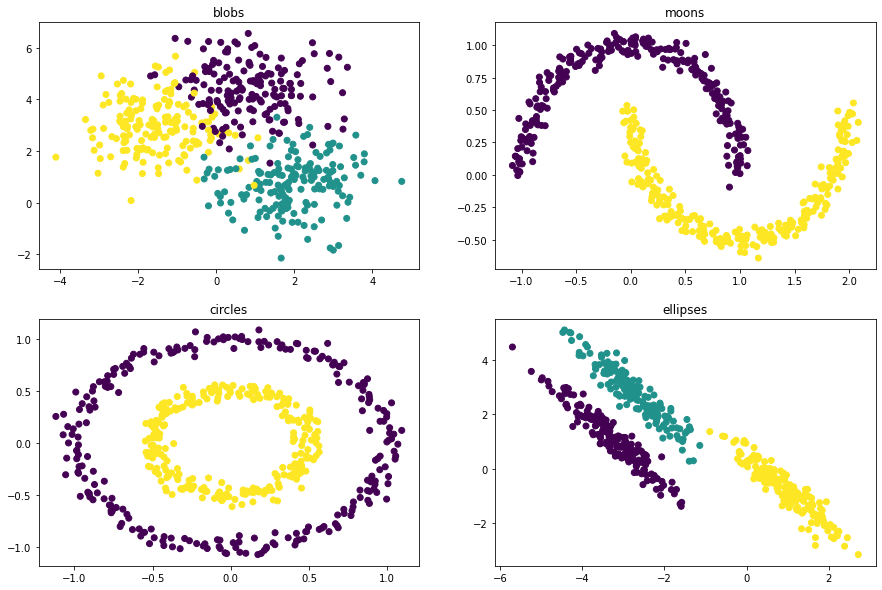

In [178]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (key, df) in enumerate(dfs.items()):
    ax = axs[i // 2, i % 2]
    ax.scatter(df['x'], df['y'], c=df['cluster'])
    ax.set_title(key)

#### Wspólny wykres klastrów dla wszystkich zbiorów danych

Pomocnicza funkcja, rysująca wszystkie klastry na jednym wykresie

In [179]:
def plot_all_clusters(dfs, title):
    plt.figure(figsize=(10, 8))
    for key, df in dfs.items():
        plt.scatter(df['x'], df['y'], label=key)
    plt.title(title)
    plt.legend()
    plt.show()

Wspólny wykres

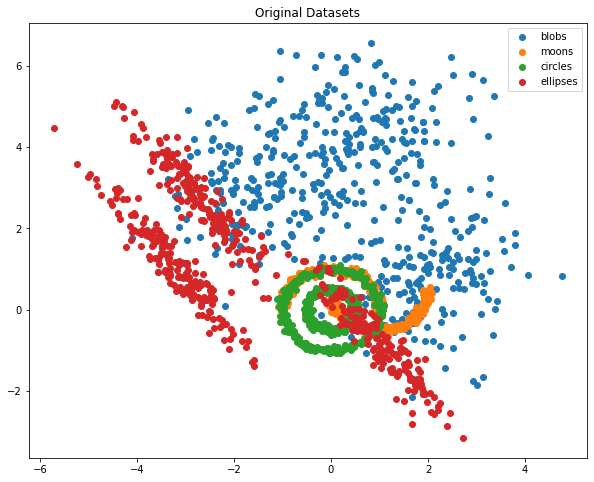

In [180]:
plot_all_clusters(dfs, 'Original Datasets')

### Analiza algorytmów klasteryzacji

#### Algorytm k-means

Pomocnicza funkcja, rysująca rezultat klasteryzacji, dokonanej przy pomocy algorytmu k-means

In [181]:
from sklearn.cluster import KMeans

def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X['x'], X['y'], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
    plt.title(f'K-Means Clustering with {n_clusters} clusters')
    plt.show()

Wykresy przedstawiające rezultaty klasteryzacji dla algorytmu k-means oraz różnych liczb klastrów kolejno dla wszystkich analizowanych w tym zadaniu zbiorów danych

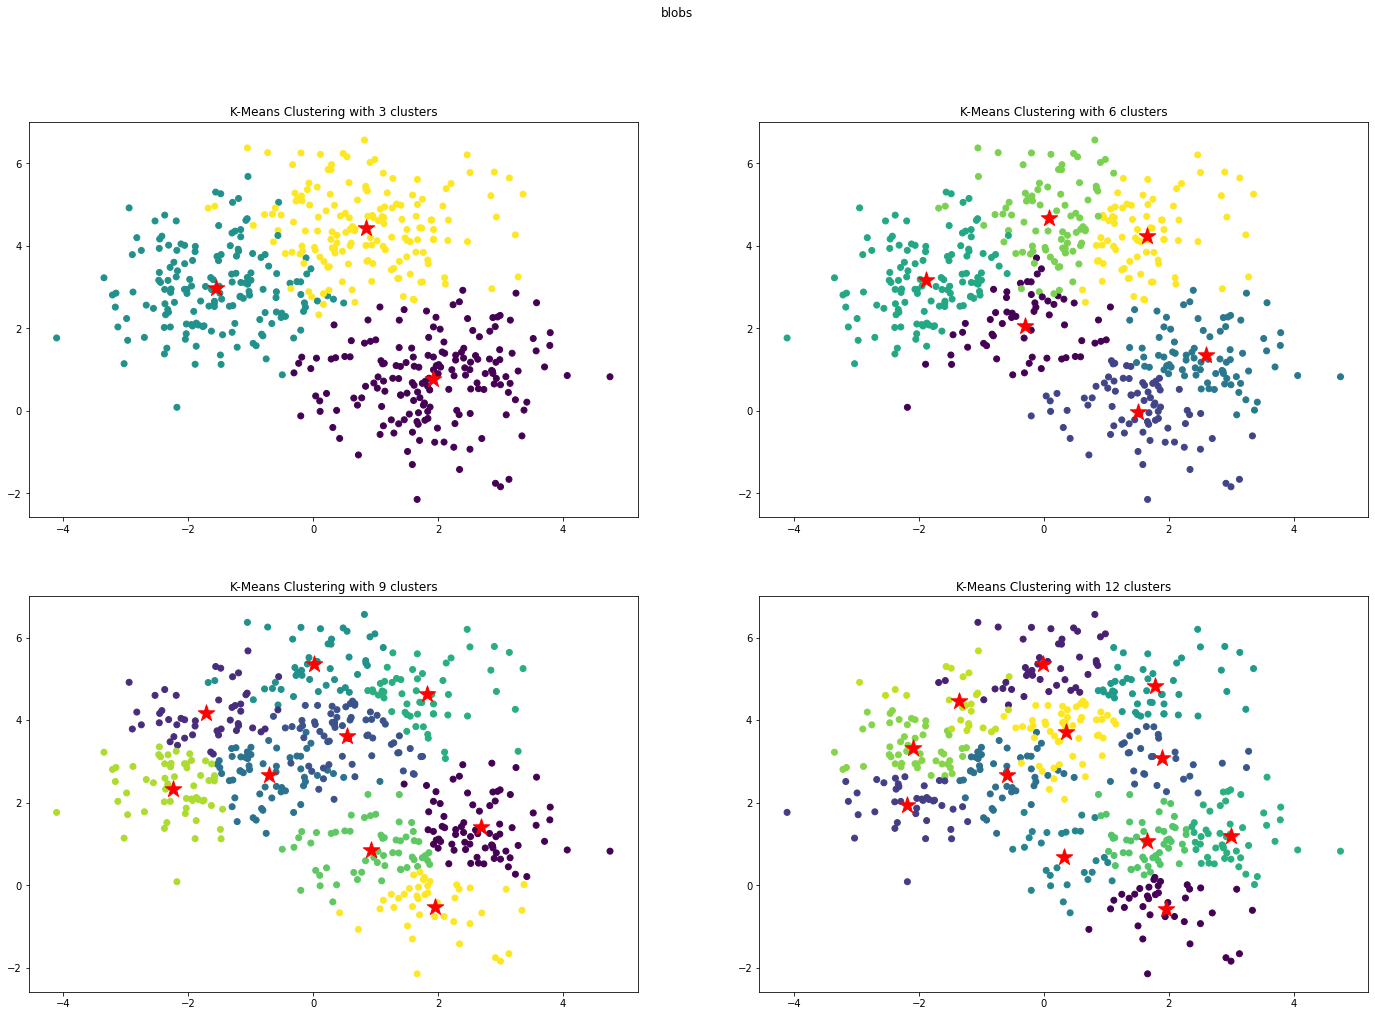

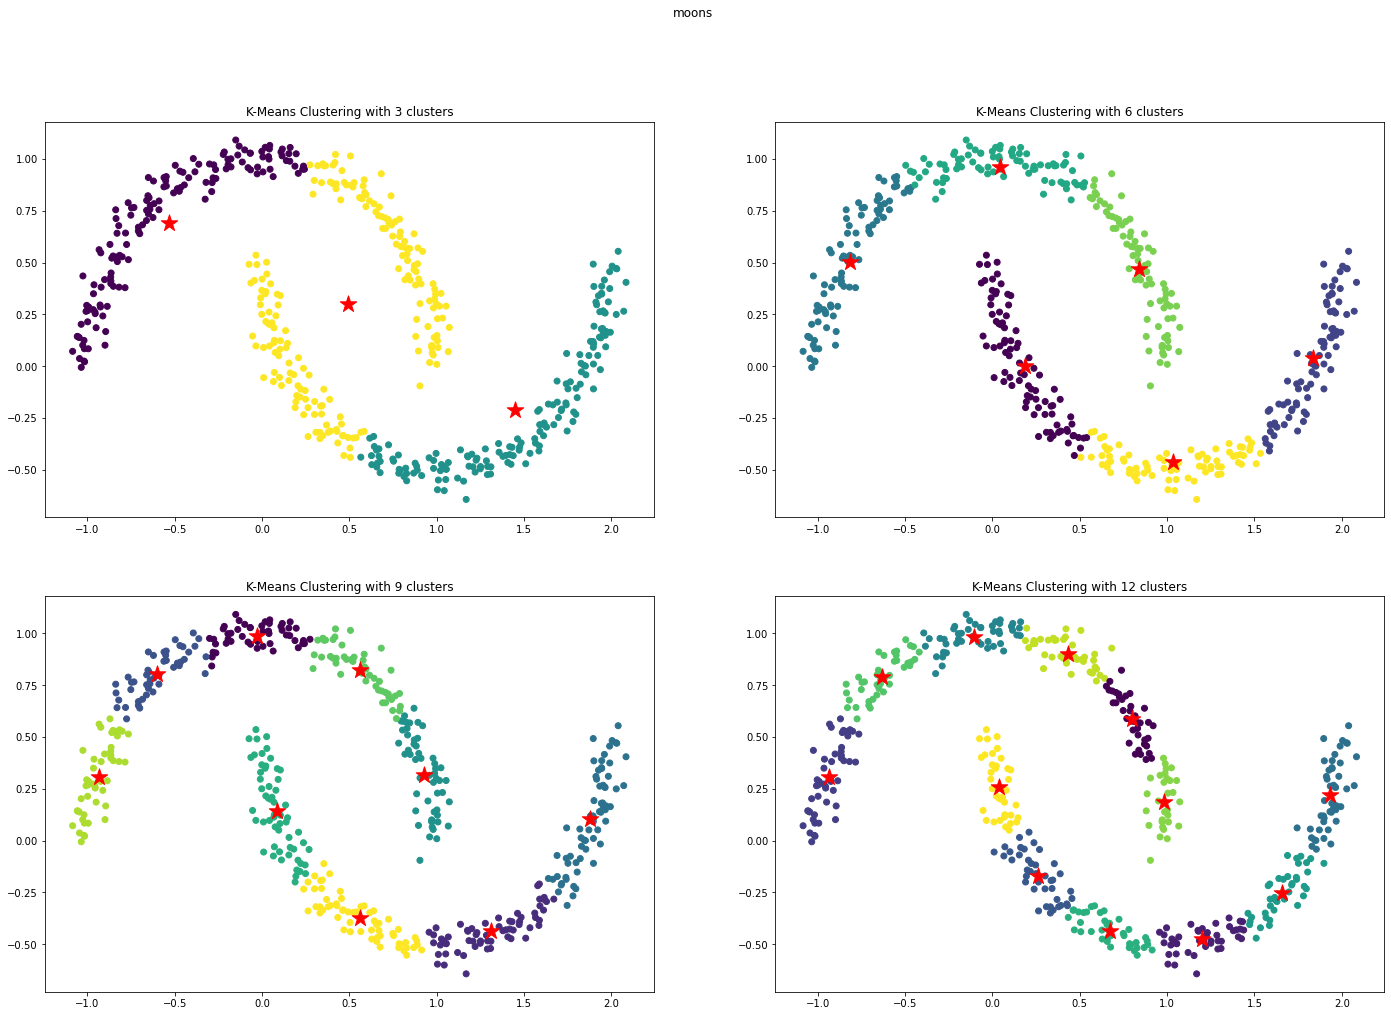

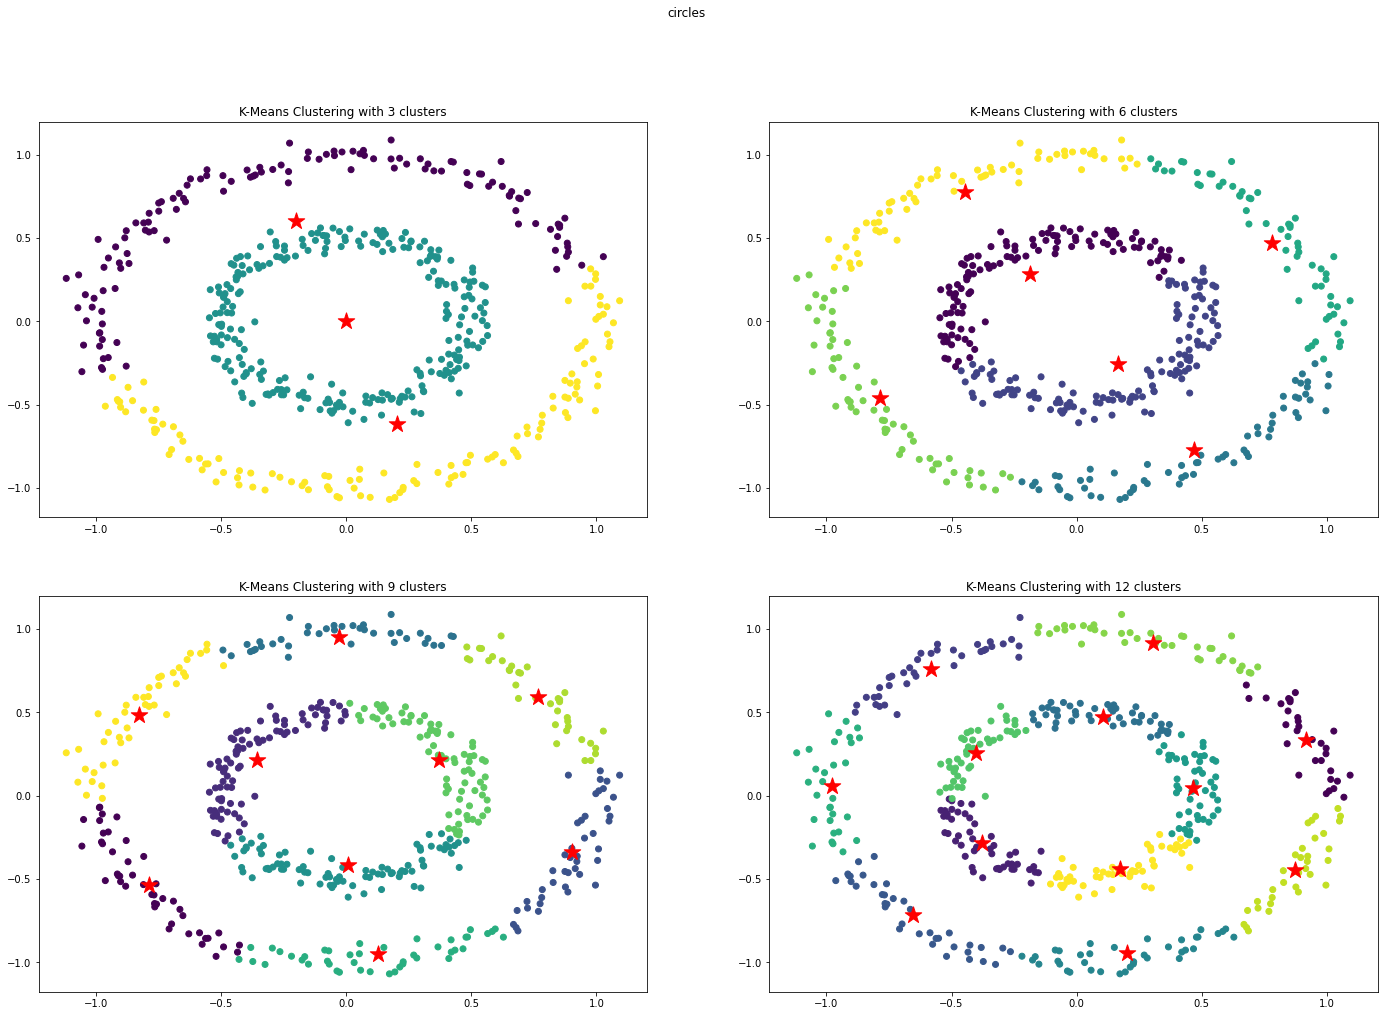

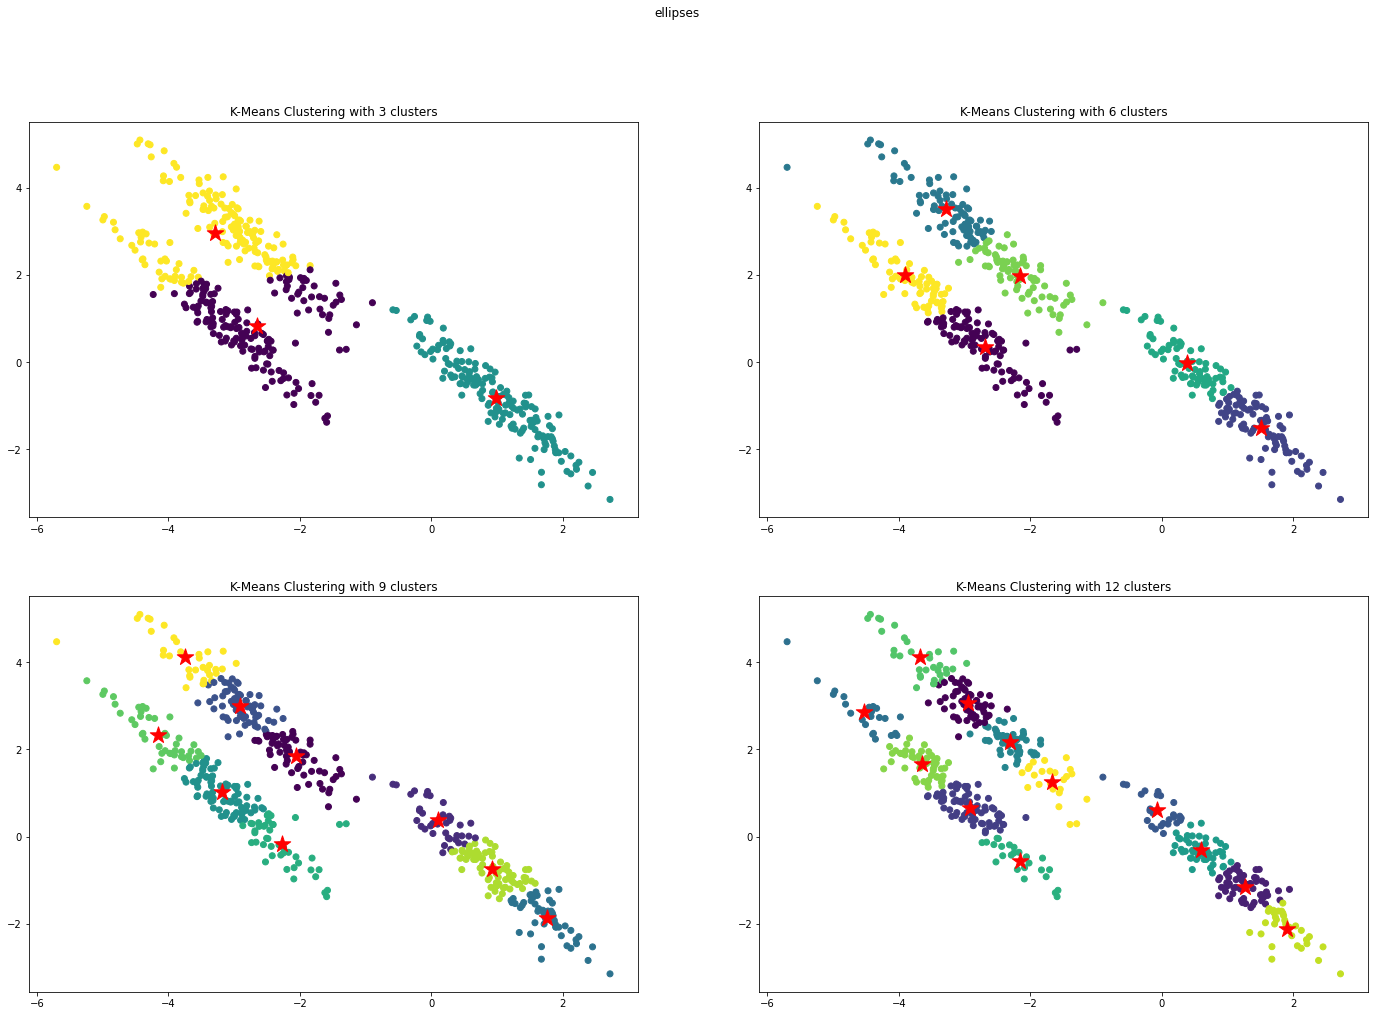

In [182]:
clusters = [3, 6, 9, 12]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(2, 2, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, n_clusters in enumerate(clusters):
        ax = axs[j // 2, j % 2]
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(df)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        ax.scatter(df['x'], df['y'], c=labels)
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
        ax.set_title(f'K-Means Clustering with {n_clusters} clusters')

#### Algorytm DBSCAN

Pomocnicza funkcja, rysująca rezultat klasteryzacji, dokonanej przy pomocy algorytmu DBSCAN

In [183]:
from sklearn.cluster import DBSCAN

def dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X['x'], X['y'], c=labels)
    plt.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
    plt.show()

Wykresy przedstawiające rezultaty klasteryzacji dokonanej, przy pomocy algorytmu DBSCAN, dla różnych wartości parametrów `eps` i `min_samples` kolejno dla wszystkich analizowanych w tym zadaniu zbiorów.

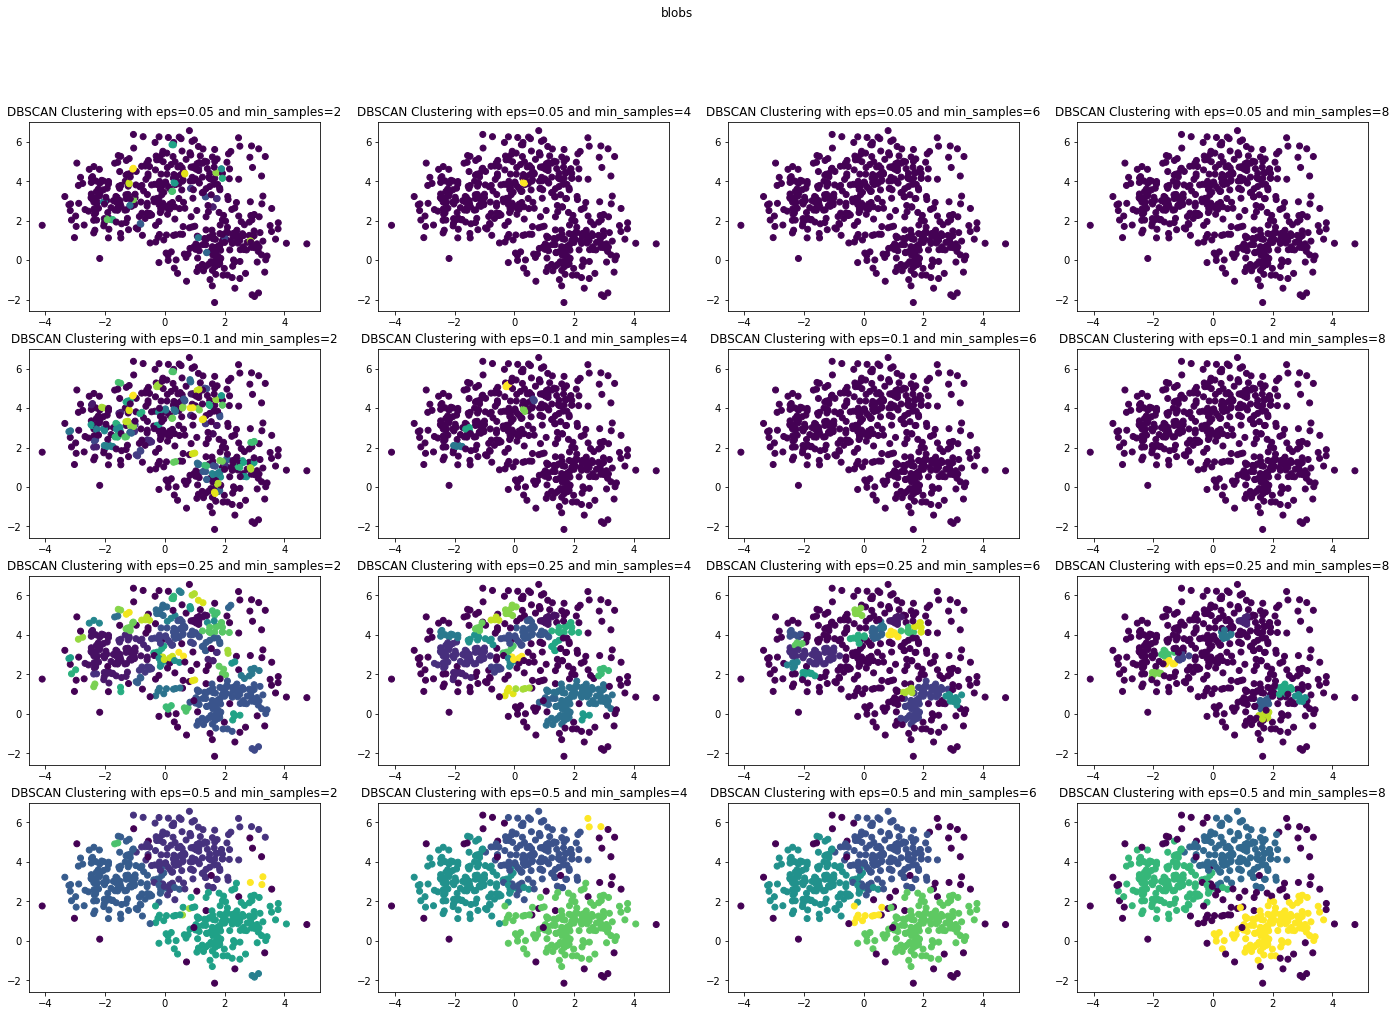

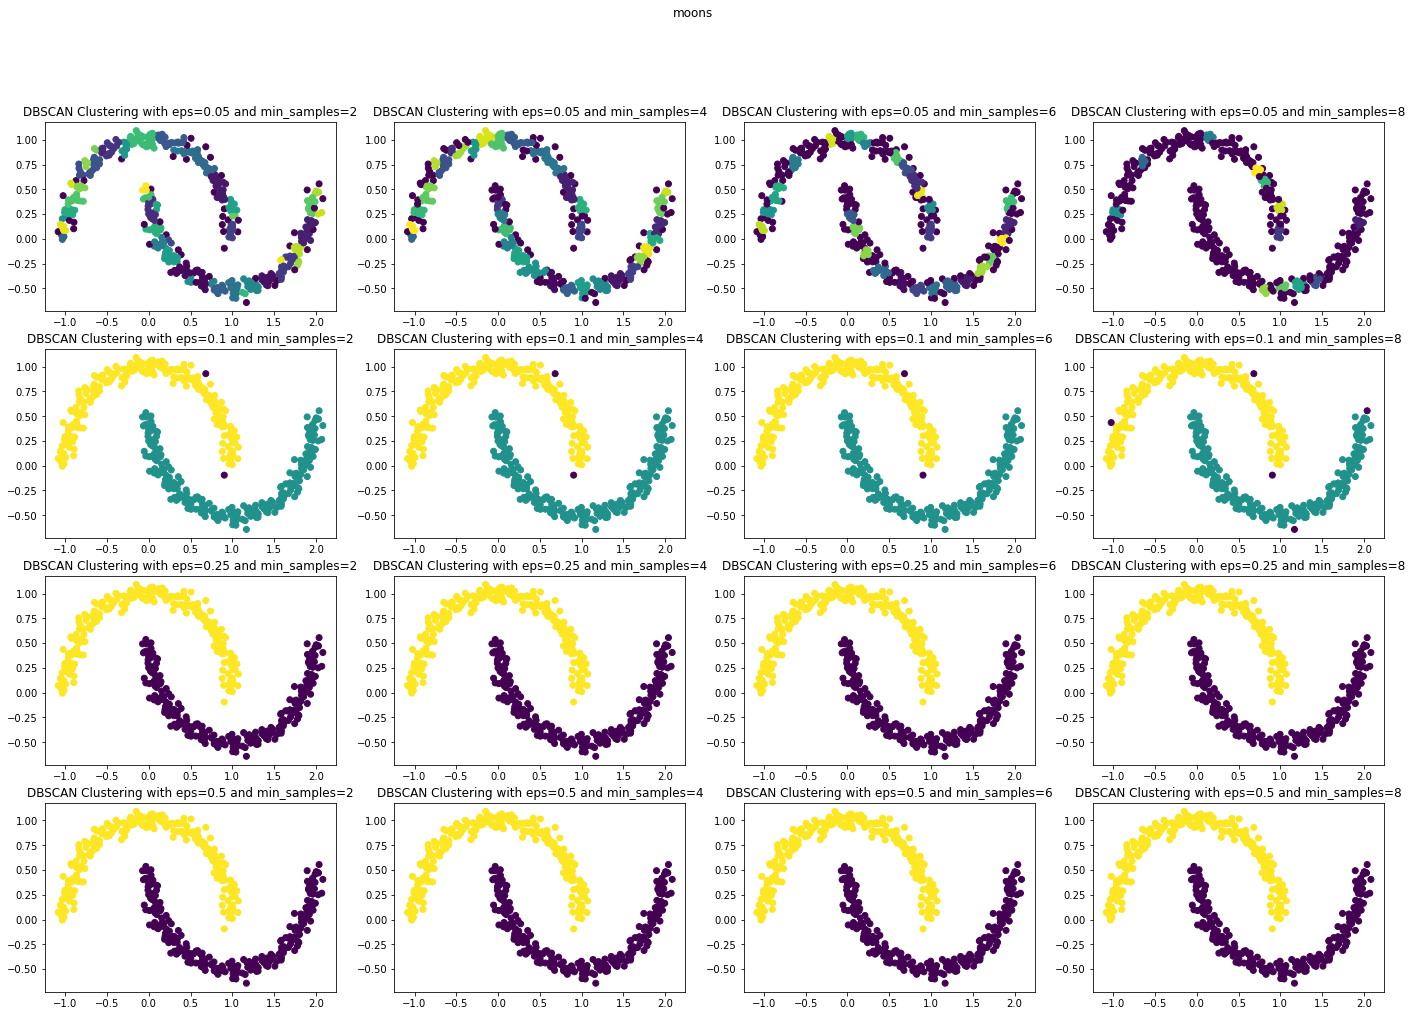

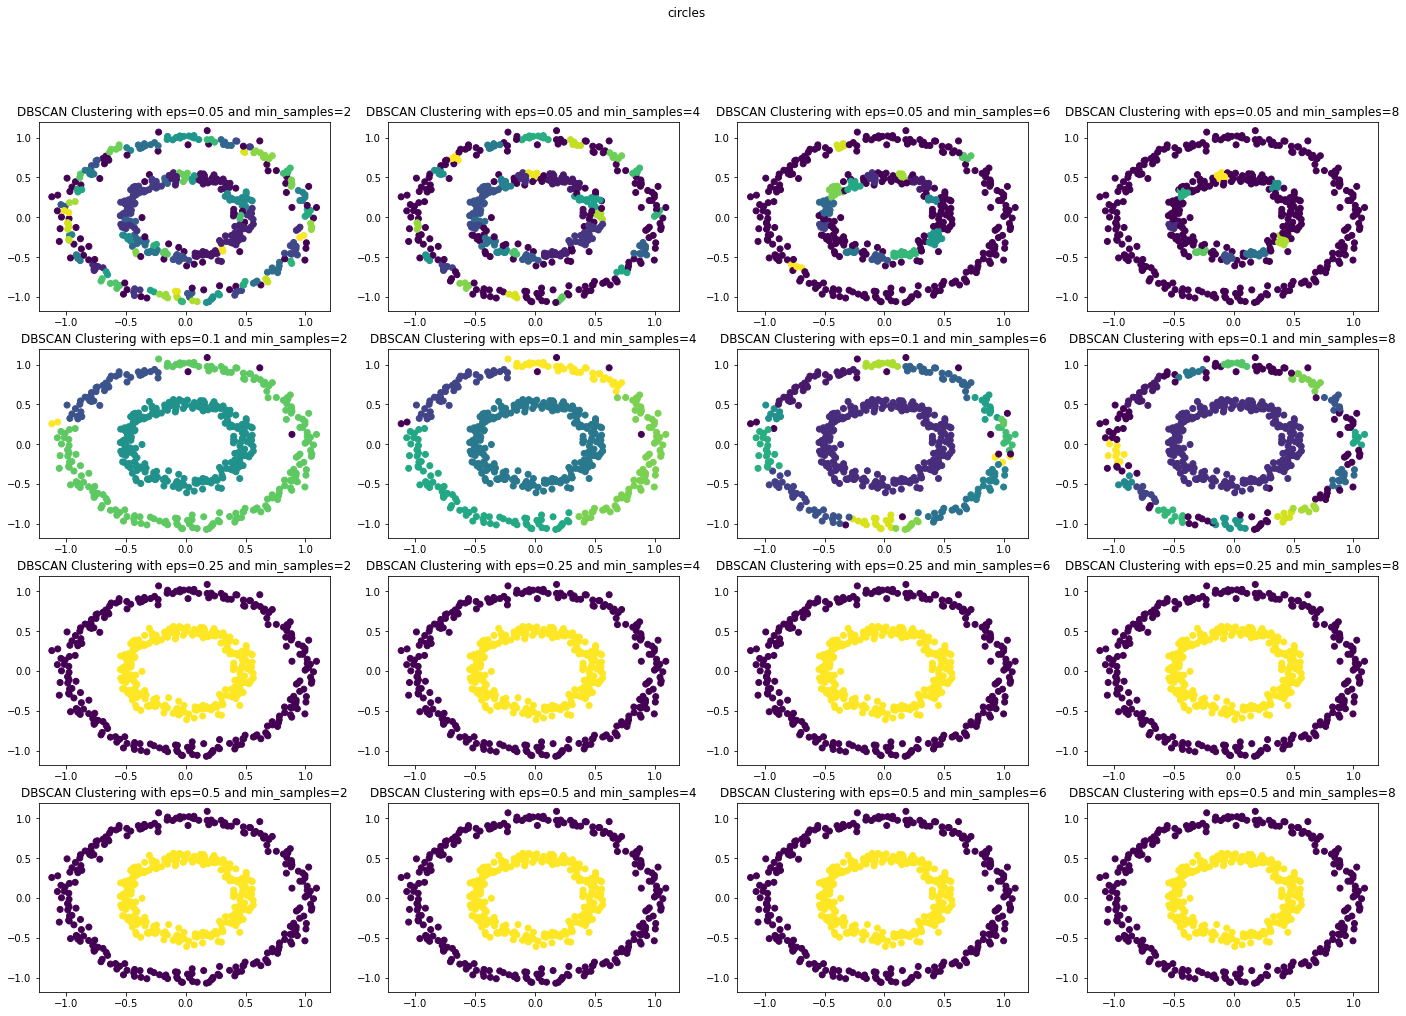

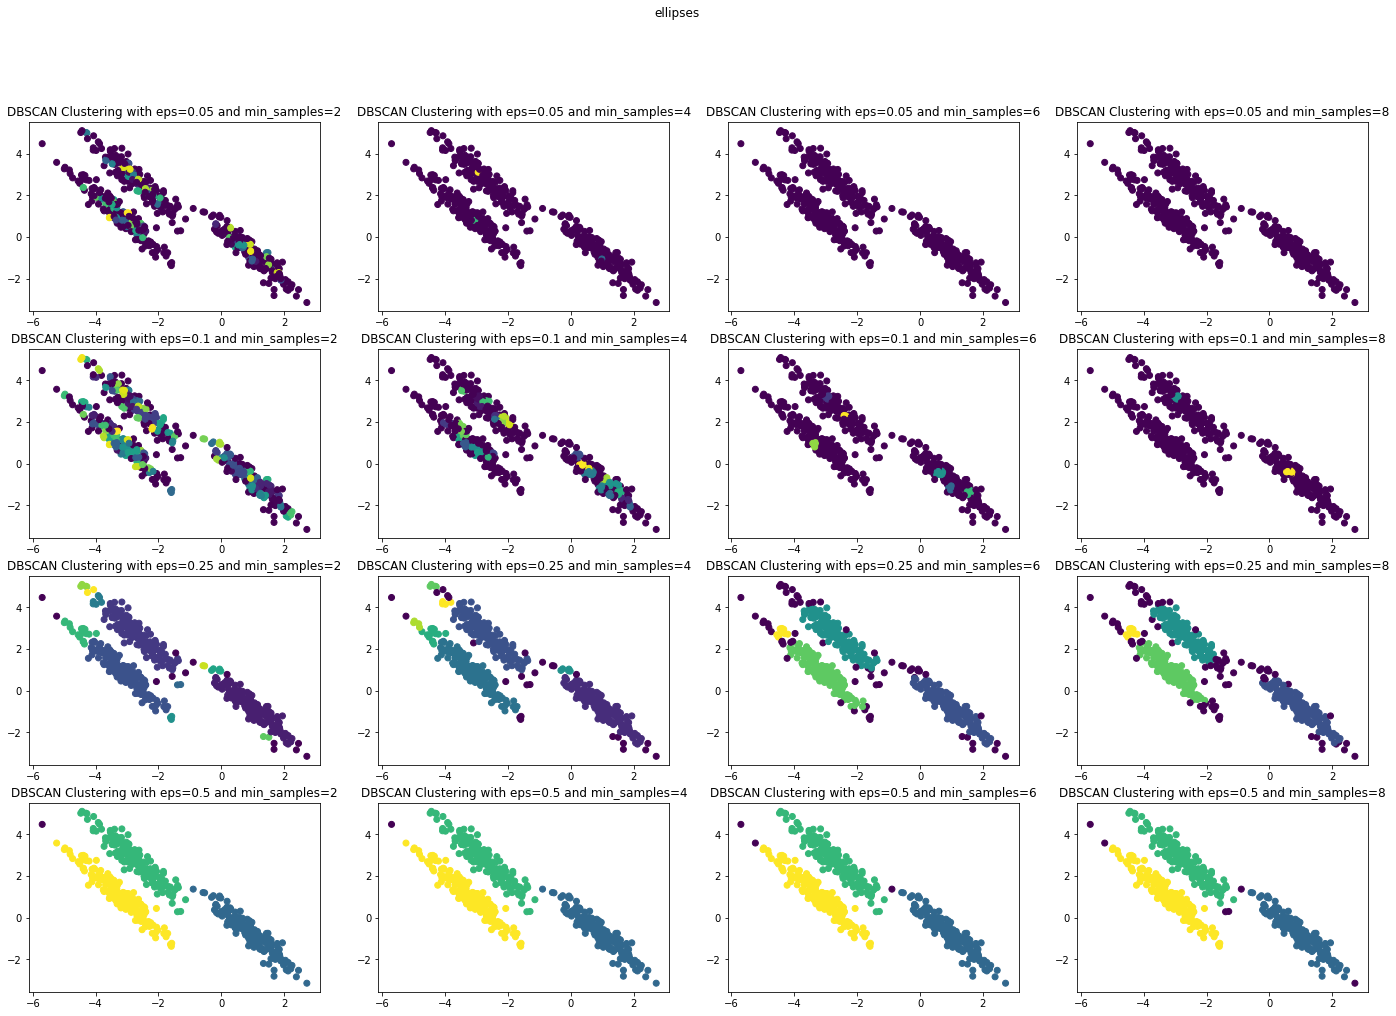

In [184]:
eps_list = [0.05, 0.1, 0.25, 0.5]
min_samples_list = [2, 4, 6, 8]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(4, 4, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, eps in enumerate(eps_list):
        for k, min_samples in enumerate(min_samples_list):
            ax = axs[j, k]
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df)
            labels = dbscan.labels_
            
            ax.scatter(df['x'], df['y'], c=labels)
            ax.set_title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')

## Zadanie 2

### Import bibliotek

In [185]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

### Wczytanie danych

Pomocnicza funkcja, wczytująca i parsująca plik CSV. Funkcja zwraca nazwy kolumn oraz dane zawarte w pliku CSV z danymi

In [186]:
def extract_columns_and_data(content: str):
    lines = content.split('\n')
    
    column_names = []
    data = []
    
    for line in lines:
        if line.startswith("@ATTRIBUTE"):
            column = line.split()[1].strip()
            column_names.append(column)
        elif not line.startswith(("@RELATION", "@DATA", "%")) and line != '':
            data.append(list(map(float, line.split(','))))
    
    return column_names, data

Wczytujemy dane, a następnie tworzymy DataFrame

In [187]:
data_path = "dataset/banknotes.csv"

with open(data_path, 'r') as f:
    content = f.read()
    column_names, data = extract_columns_and_data(content)

df = pd.DataFrame(data, columns=column_names)

Zobaczmy, z jakimi danymi mamy do czynienia

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   counterfeit  200 non-null    float64
 1   Length       200 non-null    float64
 2   Left         200 non-null    float64
 3   Right        200 non-null    float64
 4   Bottom       200 non-null    float64
 5   Top          200 non-null    float64
 6   Diagonal     200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [189]:
df.head()

counterfeit  Length   Left  Right  Bottom   Top  Diagonal
0          0.0   214.8  131.0  131.1     9.0   9.7     141.0
1          0.0   214.6  129.7  129.7     8.1   9.5     141.7
2          0.0   214.8  129.7  129.7     8.7   9.6     142.2
3          0.0   214.8  129.7  129.6     7.5  10.4     142.0
4          0.0   215.0  129.6  129.7    10.4   7.7     141.8

### Normalizacja danych

Do normalizacji danych wykorzystamy `StandardScaler`. Z oryginalnego zbioru danych odrzucamy kolumnę `counterfeit`, która oznacza przyporządkowanie banknotu do odpowiedniej klasy (`counterfeit` lub `genuine`). Zostawiamy więc jedynie kolumny zawierające informacje o cechach banknotów.

In [190]:
features = ['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Oszacowanie optymalnej liczby klastrów dla metody k-means 

#### Metoda *elbow*

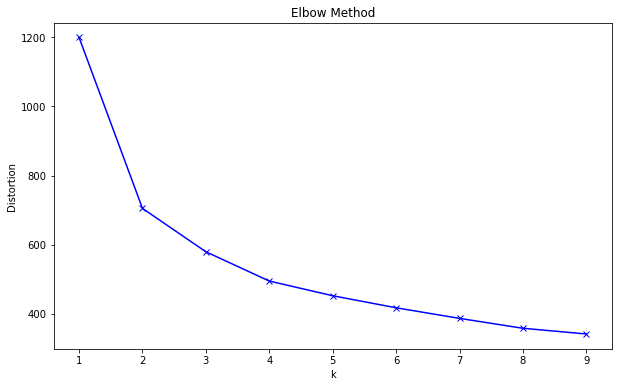

In [191]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    distortions.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

W przypadku metody łokcia (*elbow*), najlepszą konfigurację klastrów dostaniemy dla liczby klastrów, dla której na wykresie obserwujemy największe przegięcie. Dobrze to widać na otrzymanym wyżej wykresie i punktem, dla którego obserwujemy największą zmianę tempa spadku wartości, a więc największe przegięcie jest punkt dla $k=2$

#### Metoda *silhouette score*

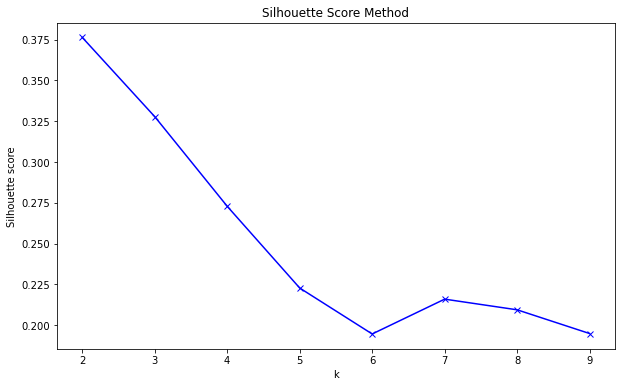

In [192]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans_model.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method')
plt.show()

W przypadku metody wyniku profilu (*silhouette score*), najlepszą konfigurację klastrów dostaniemy dla najwyższej wartości *silhouette score*. Możemy tę wartość odczytać z powyższego wykresu. Jak możemy zauważyć, najwyższy wynik dostaliśmy dla $k=2$, dlatego optymalna liczba klastrów to 2

#### Metoda *Akaike Information Criterion*

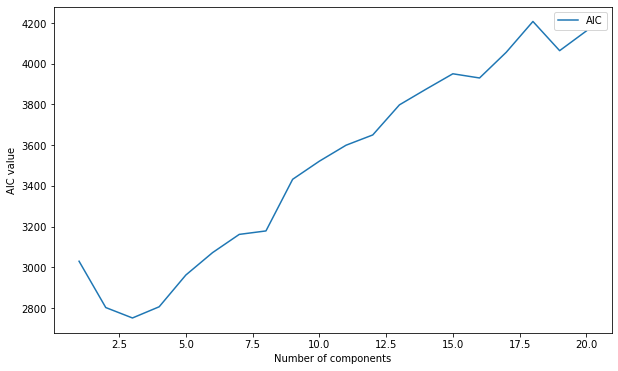

Best number of components: 3


In [193]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled) for n in n_components]

plt.figure(figsize=(10, 6))
plt.plot(n_components, [m.bic(X_scaled) for m in models], label='AIC')
plt.xlabel('Number of components')
plt.ylabel('AIC value')
plt.legend(loc='best')
plt.show()

best_n_components = np.argmin([m.bic(X_scaled) for m in models]) + 1

print(f'Best number of components: {best_n_components}')

W przypadku metody kryterium informacyjnego Akaikego (*Akaike Information Criterion*), najlepszą konfigurację klastrów dostaniemy dla liczy klastrów równej 3.

### Sprawdzanie poprawności przypisania banknotów do klastrów dla metody DBSCAN

In [219]:
# Sprawdzanie poprawności przypisania banknotów do klastrów dla metody DBSCAN
dbscan_model = DBSCAN(eps=2.5, min_samples=5)
dbscan_model.fit(X_scaled)
labels = dbscan_model.labels_

print(f'Number of clusters: {len(set(labels))}')
print(f'Number of outliers: {np.sum(labels == -1)}')

Number of clusters: 2
Number of outliers: 1


In [ ]:
optimal_k = 2
kmeans_model = KMeans(n_clusters=optimal_k, n_init=10)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

Assigned samples: 196/200


In [ ]:
kmeans_results = pd.DataFrame({'Original': df['counterfeit'], 'k-means': kmeans_labels})
dbscan_results = pd.DataFrame({'Original': df['counterfeit'], 'DBSCAN': dbscan_labels})

print(kmeans_results.groupby(['Original', 'k-means']).size())
print(dbscan_results.groupby(['Original', 'DBSCAN']).size())

Original  k-means
0.0       0           92
          1            8
1.0       1          100
dtype: int64
Original  DBSCAN
0.0       -1         2
           0        98
1.0       -1         2
           0        98
dtype: int64


In [ ]:
true_labels = df['counterfeit']

kmeans_homogeneity = metrics.homogeneity_score(true_labels, kmeans_labels)
kmeans_completeness = metrics.completeness_score(true_labels, kmeans_labels)
kmeans_vmeasure = metrics.v_measure_score(true_labels, kmeans_labels)

dbscan_homogeneity = metrics.homogeneity_score(true_labels, dbscan_labels)
dbscan_completeness = metrics.completeness_score(true_labels, dbscan_labels)
dbscan_vmeasure = metrics.v_measure_score(true_labels, dbscan_labels)

print(f"K-Means homogeneity: {kmeans_homogeneity}")
print(f"K-Means completeness: {kmeans_completeness}")
print(f"K-Means v-measure: {kmeans_vmeasure}")

print(f"DBSCAN homogeneity: {dbscan_homogeneity}")
print(f"DBSCAN completeness: {dbscan_completeness}")
print(f"DBSCAN v-measure: {dbscan_vmeasure}")

K-Means homogeneity: 0.7942888437190893
K-Means completeness: 0.7979767420525216
K-Means v-measure: 0.7961285220549091
DBSCAN homogeneity: 1.1211992763352225e-15
DBSCAN completeness: 7.92700067594628e-15
DBSCAN v-measure: 1.9645338229155168e-15


### Uzyskane wyniki

**K-Means**
- Homogenność: 0.7943
- Pełnia: 0.7980
- V-miara: 0.7961

**DBSCAN**
- Homogenność: 1.1212e-15
- Pełnia: 7.9270e-15
- V-miara: 1.9645e-15

### Wnioski

Ogólna ocena klasyfikatorów wydaje się sugerować, że K-Means osiągnął znacznie lepszą jakość wyników niż DBSCAN. Wartości bliskie 1 dla homogenności, pełności i V-miary w przypadku K-Means wskazują na dobrą jakość klasteryzacji i spójność grup. W przeciwnym razie, wyniki DBSCAN wykazują prawie zerową jakość, co sugeruje, że przy obecnych parametrach, DBSCAN może mieć trudności z dobrym oddzieleniem danych lub być nieodpowiedni dla tego zbioru danych.